In [7]:
import pandas as pd

# Caricamento (assumendo i nomi colonne standard)
df = pd.read_csv('data/train/training_data.csv')

# Visualizza le colonne disponibili
print(df.columns.tolist())

# 1. Quanti dati abbiamo per ogni motore?
print(df.groupby('ESN').size())

# 2. Controllo valori mancanti (specialmente per i sensori 13 e 14)
print(df.isnull().sum())

# 3. Quanti cicli unici abbiamo per ogni motore
df.groupby('ESN')['Cycles_Since_New'].nunique()

['ESN', 'Cycles_Since_New', 'Snapshot', 'Cumulative_WWs', 'Cumulative_HPC_SVs', 'Cumulative_HPT_SVs', 'Sensed_Altitude', 'Sensed_Mach', 'Sensed_Pamb', 'Sensed_Pt2', 'Sensed_TAT', 'Sensed_WFuel', 'Sensed_VAFN', 'Sensed_VBV', 'Sensed_Fan_Speed', 'Sensed_Core_Speed', 'Sensed_T25', 'Sensed_T3', 'Sensed_Ps3', 'Sensed_T45', 'Sensed_P25', 'Sensed_T5', 'Cycles_to_WW', 'Cycles_to_HPC_SV', 'Cycles_to_HPT_SV']
ESN
101    14738
102    15044
103    14856
104    15064
dtype: int64
ESN                     0
Cycles_Since_New        0
Snapshot                0
Cumulative_WWs          0
Cumulative_HPC_SVs      0
Cumulative_HPT_SVs      0
Sensed_Altitude         0
Sensed_Mach             0
Sensed_Pamb             0
Sensed_Pt2              0
Sensed_TAT              0
Sensed_WFuel          697
Sensed_VAFN             0
Sensed_VBV              0
Sensed_Fan_Speed        0
Sensed_Core_Speed     697
Sensed_T25              0
Sensed_T3              60
Sensed_Ps3             60
Sensed_T45            757
Sensed_P

ESN
101    2001
102    2001
103    2001
104    2001
Name: Cycles_Since_New, dtype: int64

Correlazione dei sensori con i cicli rimanenti al Water-Wash:
Sensed_VBV           0.008858
Sensed_WFuel         0.003582
Sensed_T25           0.001763
Sensed_Ps3          -0.000084
Sensed_P25          -0.000250
Sensed_T5           -0.003046
Sensed_T3           -0.003413
Sensed_VAFN         -0.004008
Sensed_T45          -0.004850
Sensed_Core_Speed   -0.007704
Sensed_Fan_Speed    -0.010615
Name: Cycles_to_WW, dtype: float64


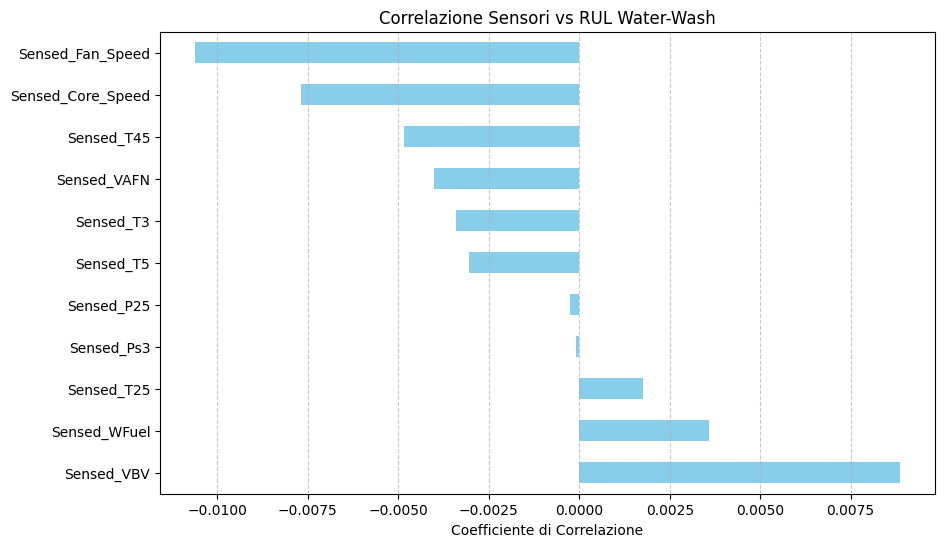

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista dei sensori e delle variabili ambientali
sensors = [
    'Sensed_T25', 'Sensed_T3', 'Sensed_Ps3', 'Sensed_T45', 
    'Sensed_P25', 'Sensed_T5', 'Sensed_WFuel', 'Sensed_Core_Speed',
    'Sensed_Fan_Speed', 'Sensed_VAFN', 'Sensed_VBV'
]
target = 'Cycles_to_WW'

# Calcolo della correlazione di Pearson
# Usiamo .dropna() per gestire i 757/697 valori mancanti che abbiamo trovato prima
correlations = df[sensors + [target]].corr()[target].sort_values(ascending=False)

# Rimuoviamo la riga del target stesso
correlations = correlations.drop(target)

print("Correlazione dei sensori con i cicli rimanenti al Water-Wash:")
print(correlations)

# Visualizzazione
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='skyblue')
plt.title('Correlazione Sensori vs RUL Water-Wash')
plt.xlabel('Coefficiente di Correlazione')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# 1. Creiamo un subset con solo lo Snapshot 1
df_takeoff = df[df['Snapshot'] == 1].copy()

# 2. Ricalcoliamo la correlazione con il target Cycles_to_WW
# Usiamo i sensori che abbiamo identificato come "critici" per il compressore
sensors_hpc = ['Sensed_T25', 'Sensed_T3', 'Sensed_Ps3', 'Sensed_T45', 
    'Sensed_P25', 'Sensed_T5', 'Sensed_WFuel', 'Sensed_Core_Speed',
    'Sensed_Fan_Speed', 'Sensed_VAFN', 'Sensed_VBV']
corr_takeoff = df_takeoff[sensors_hpc + ['Cycles_to_WW']].corr()['Cycles_to_WW'].drop('Cycles_to_WW')

print("Correlazione allo Snapshot 1 (Decollo):")
print(corr_takeoff.sort_values())

Correlazione allo Snapshot 1 (Decollo):
Sensed_T45          -0.012745
Sensed_T5           -0.011669
Sensed_T3           -0.010109
Sensed_Fan_Speed    -0.008371
Sensed_T25          -0.006303
Sensed_P25          -0.005336
Sensed_WFuel        -0.001305
Sensed_Core_Speed   -0.000530
Sensed_Ps3           0.006153
Sensed_VAFN          0.006568
Sensed_VBV           0.011713
Name: Cycles_to_WW, dtype: float64
